In [ ]:
!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import re

In [ ]:
df = pd.read_csv("Train_Feb.csv")

In [ ]:
df

,text
0,@k_c12345 Brother this called link 👇\nhttps://...
1,Ukraine invasion: Who is President Volodymyr Z...
2,So it now looks like we're in a new phase of t...
3,@vanderbellen @karlnehammer TOP RUSSIAN AGGRES...
4,@ZelenskyyUa @EmmanuelMacron Ukraine won't fal...
...,...
1782546,@UNESCO Dear UNESCO. I'm a peaceful citizen of...
1782547,This is not Ukraine vs Russia war. This is a c...
1782548,Russia 🇷🇺 is warn... Don't provoke the 4nation...
1782549,Africa Report: How Africa factors in #RussiaUk...


In [ ]:
df['text'] = df['text'].astype('str') 

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt
def clean_tweets(tweets):
    #remove twitter Return handles (RT @xxx:)
    tweets = np.vectorize(remove_pattern)(tweets, "RT @[\w]*:") 
    
    #remove twitter handles (@xxx)
    tweets = np.vectorize(remove_pattern)(tweets, "@[\w]*")
    
    #remove URL links (httpxxx)
    tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]*")
    
    #remove special characters, numbers, punctuations (except for #)
    tweets = np.core.defchararray.replace(tweets, "[^a-zA-Z]", " ")
    
    return tweets

In [ ]:
df['text'] = clean_tweets(df['text'])

In [ ]:
df['text'].head()

0     Brother this called link 👇\n\n\nIt's an advis...
1    Ukraine invasion: Who is President Volodymyr Z...
2    So it now looks like we're in a new phase of t...
3      TOP RUSSIAN AGGRESSION AGAINST #UKRAINE.  CL...
4      Ukraine won't fall for Russia because the Uk...
Name: text, dtype: object

In [ ]:
scores = []

# Declare variables for scores
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

for i in range(df['text'].shape[0]):
    #print(analyser.polarity_scores(sentiments_pd['text'][i]))
    compound = analyser.polarity_scores(df['text'][i])["compound"]
    pos = analyser.polarity_scores(df['text'][i])["pos"]
    neu = analyser.polarity_scores(df['text'][i])["neu"]
    neg = analyser.polarity_scores(df['text'][i])["neg"]
    
    scores.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })

In [ ]:
sentiments_score = pd.DataFrame.from_dict(scores)
df = df.join(sentiments_score)

In [ ]:
df.head(10)

,text,Compound,Positive,Negative,Neutral
0,Brother this called link 👇\n\n\nIt's an advis...,-0.3063,0.055,0.104,0.841
1,Ukraine invasion: Who is President Volodymyr Z...,0.0772,0.085,0.000,0.915
2,So it now looks like we're in a new phase of t...,-0.0000,0.111,0.129,0.760
3,TOP RUSSIAN AGGRESSION AGAINST #UKRAINE. CL...,0.1739,0.233,0.208,0.559
4,Ukraine won't fall for Russia because the Uk...,0.3818,0.167,0.000,0.833
5,Captured Russian soldier with tears in his eye...,0.5866,0.198,0.107,0.694
6,STOP RUSSIAN AGGRESSION AGAINST #UKRAINE. CL...,-0.7140,0.120,0.346,0.534
7,You mean Russia for Ukraine,0.0000,0.000,0.000,1.000
8,Russia Ukraine WAR Nothing but power &amp; p...,0.9391,0.323,0.121,0.556
9,The attack on Ukraine was conducted from the ...,0.2481,0.170,0.135,0.695


In [ ]:
score = df["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
df["Sentiment"] = sentiment
df.head()

,text,Compound,Positive,Negative,Neutral,Sentiment
0,Brother this called link 👇\n\n\nIt's an advis...,-0.3063,0.055,0.104,0.841,Negative
1,Ukraine invasion: Who is President Volodymyr Z...,0.0772,0.085,0.000,0.915,Positive
2,So it now looks like we're in a new phase of t...,-0.0000,0.111,0.129,0.760,Neutral
3,TOP RUSSIAN AGGRESSION AGAINST #UKRAINE. CL...,0.1739,0.233,0.208,0.559,Positive
4,Ukraine won't fall for Russia because the Uk...,0.3818,0.167,0.000,0.833,Positive


In [ ]:
df

,text,Compound,Positive,Negative,Neutral,Sentiment
0,Brother this called link 👇\n\n\nIt's an advis...,-0.3063,0.055,0.104,0.841,Negative
1,Ukraine invasion: Who is President Volodymyr Z...,0.0772,0.085,0.000,0.915,Positive
2,So it now looks like we're in a new phase of t...,-0.0000,0.111,0.129,0.760,Neutral
3,TOP RUSSIAN AGGRESSION AGAINST #UKRAINE. CL...,0.1739,0.233,0.208,0.559,Positive
4,Ukraine won't fall for Russia because the Uk...,0.3818,0.167,0.000,0.833,Positive
...,...,...,...,...,...,...
1782546,Dear UNESCO. I'm a peaceful citizen of Ukrain...,-0.4019,0.157,0.204,0.639,Negative
1782547,This is not Ukraine vs Russia war. This is a c...,-0.8779,0.087,0.257,0.655,Negative
1782548,Russia 🇷🇺 is warn... Don't provoke the 4nation...,0.5801,0.239,0.130,0.631,Positive
1782549,Africa Report: How Africa factors in #RussiaUk...,-0.5994,0.000,0.218,0.782,Negative


In [ ]:
df.to_csv('Train_Feb_VADER.csv')

In [ ]:
df.value_counts

<bound method DataFrame.value_counts of                                                       text  Compound  \
0         Brother this called link 👇\n\n\nIt's an advis...   -0.3063   
1        Ukraine invasion: Who is President Volodymyr Z...    0.0772   
2        So it now looks like we're in a new phase of t...   -0.0000   
3          TOP RUSSIAN AGGRESSION AGAINST #UKRAINE.  CL...    0.1739   
4          Ukraine won't fall for Russia because the Uk...    0.3818   
...                                                    ...       ...   
1782546   Dear UNESCO. I'm a peaceful citizen of Ukrain...   -0.4019   
1782547  This is not Ukraine vs Russia war. This is a c...   -0.8779   
1782548  Russia 🇷🇺 is warn... Don't provoke the 4nation...    0.5801   
1782549  Africa Report: How Africa factors in #RussiaUk...   -0.5994   
1782550     I live in the west..  I'm Indian... agreed ...    0.1328   

         Positive  Negative  Neutral Sentiment  
0           0.055     0.104    0.841  Negative

In [ ]:
table = df.groupby('Sentiment').count()

In [ ]:
table

,text,Compound,Positive,Negative,Neutral
Sentiment,,,,,
Negative,958948,958948,958948,958948,958948
Neutral,268163,268163,268163,268163,268163
Positive,555440,555440,555440,555440,555440


In [ ]:
import dataframe_image as dfi
df_styled = table.style.background_gradient()
dfi.export(df_styled,"Sentiment_analysis_Table_Feb_Train.png")

/opt/anaconda3/lib/python3.8/site-packages/dataframe_image/_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'
[0419/205839.648742:INFO:headless_shell.cc(659)] Written to file /var/folders/lr/vzz089755mbdp247s0x54vmr0000gn/T/tmp5jz0zwi3/temp.png.


In [ ]:
import matplotlib.pyplot as plt


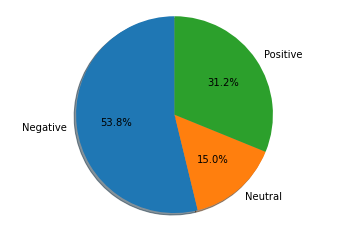

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Negative', 'Neutral', 'Positive'
sizes = [958948, 268163, 555440]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('Sentiment_Analysis_Feb_Train.png')
plt.show()
